In [1]:
import torch
from PIL import Image
from torchvision import transforms
import os
from clip_visual_model import CLIPViT

/home/ligaojie/anaconda3/envs/grx_tct/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [4]:
model = CLIPViT().to(device)
model.load_from('biomedclip')
model.eval()

load backbone from: biomedclip
Missing keys: []
Unexpected keys: []
=> backbone loaded successfully 'biomedclip'


CLIPViT(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (proj): Linear(in_features=768, out_features=768, bias=True)
      )
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): MLPBlock(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (act): GELU()
      )
    )
    (1): Block(
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (proj): Linear(in_features=768, out_features=768, bias=True)
      )
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): MLPBlock

In [40]:
target_patch_size = (1024,1024)
precess = transforms.Compose([
    transforms.Resize(target_patch_size),
    transforms.ToTensor(),
])

In [42]:
#test_img_path = '/home1/lgj/TCT_smear_lgj/POS/201218123137-17-3-ASC-US/3_22.jpg'
test_img_path = '/home/commonfile/TCTAnnotated(non-gynecologic)/Annotated_KSJ/Annotated-KSJ-TCTNGC-XML/BJFFK-JPL570703/1_12.jpg'
test_img_gt_path = 'input_with_gt/ngc/BJFFK-JPL570703/1_12.jpg'
test_img = Image.open(test_img_path)
test_img = precess(test_img).unsqueeze(0).to(device)
test_img_gt = Image.open(test_img_gt_path)
test_img_gt = precess(test_img_gt)

In [43]:
with torch.no_grad():
    image_attention = model.get_last_selfattention(test_img)
    print(image_attention.shape)
    cls_attention = torch.mean(image_attention, dim=0)[0,1:].reshape(64,64)
    print(cls_attention.shape)

torch.Size([12, 4097, 4097])
torch.Size([64, 64])


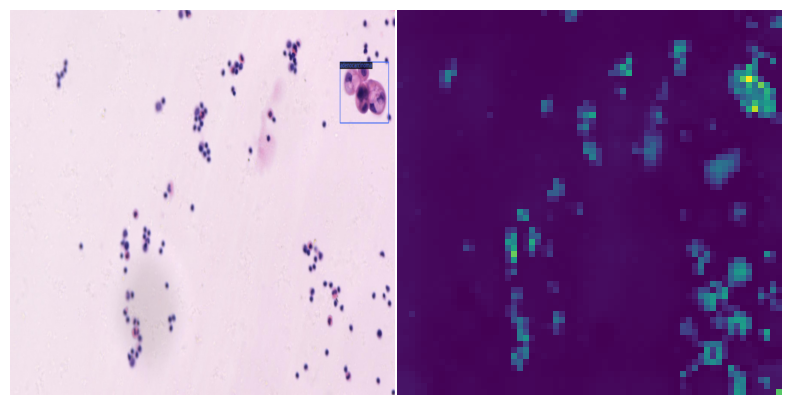

: 

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[10, 5], frameon=False)
ax = fig.add_subplot(1, 2, 1)
ax.axis("off")
ax.imshow(test_img_gt.permute(1,2,0))
ax = fig.add_subplot(1, 2, 2)
ax.axis("off")
ax.imshow(cls_attention.to('cpu'))
fig.subplots_adjust(hspace=0, wspace=0)